In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import kendalltau
import seaborn as sns

import sys; sys.path.append('../')
from PGDL.sample_code_submission.internal_rep.matrix_funcs import compute_complexity, get_KF_Schatten_norms

In [2]:
def rstar_bound(Z):
    n = Z.shape[0]
    _, s, _ = np.linalg.svd(Z / np.sqrt(n))
    evals = s**2
    
    return min([
        i / n + np.sqrt(np.sum(evals[i+1:]) / n) for i in range(len(evals))
    ])

def compute_matrixnorm(X, k=5):
    '''
    Input: internal rep matrices
    compute different notions of matrix norms of internal representation matrices
    '''
    plot_dict = {'KF-raw': [], 'KF-ratio': [], 'KF-kernel':[], 'Schatten': []}
    for i in range(len(X)):
        rep = X[i]
        KF_norms, KF_ratios, KF_kers, Schattens, _, _ = get_KF_Schatten_norms(rep, num_k=k)
        plot_dict['KF-raw'].append(KF_norms)
        plot_dict['KF-ratio'].append(KF_ratios)
        plot_dict['KF-kernel'].append(KF_kers)
        plot_dict['Schatten'].append(Schattens)
    return plot_dict

In [3]:
raw_dir = Path('../data/raw/4cluster')

In [4]:
fish_ids = list(range(10, 18))

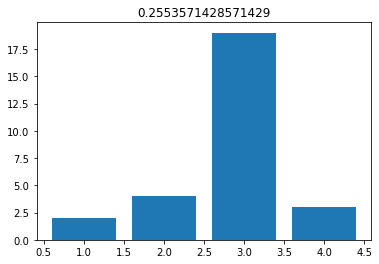

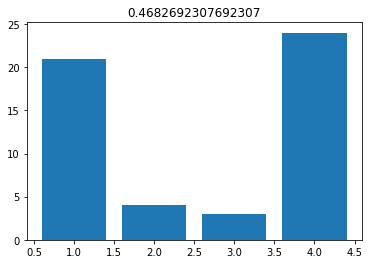

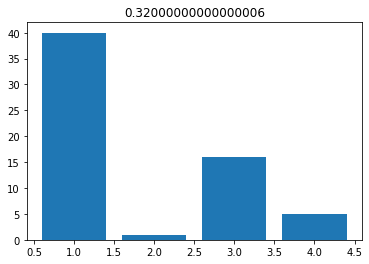

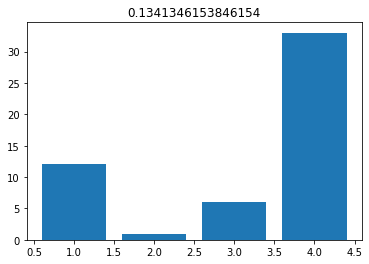

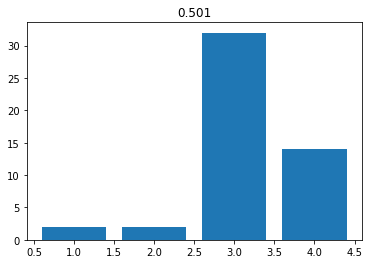

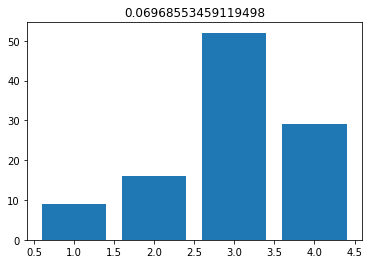

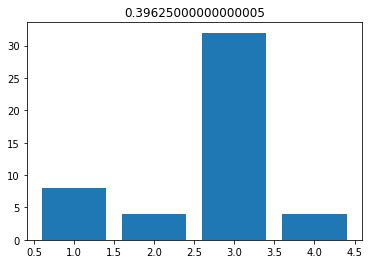

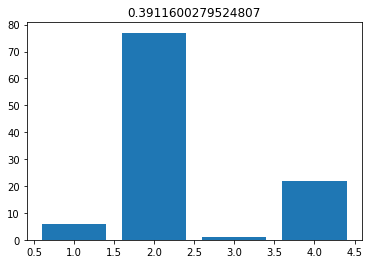

In [8]:
Zs = []
complexities = []
errors = []
for fish_id in fish_ids:
    Z = np.genfromtxt(raw_dir / f'fish{fish_id}_kmeans_clust.csv', delimiter=',')
    error = np.genfromtxt(raw_dir / f'fish{fish_id}_raw_performanceTimes.csv', delimiter=',')
    Zs.append(Z)
    complexities.append(rstar_bound(Z))
    errors.append(np.mean(error))
    
    plt.bar(np.arange(1, 5), Z.sum(0))
    plt.title(errors[-1])
    plt.show()

mat_norm_dict = compute_matrixnorm(Zs)

In [6]:
errors

[0.2553571428571429,
 0.4682692307692307,
 0.32000000000000006,
 0.1341346153846154,
 0.501,
 0.06968553459119498,
 0.39625000000000005,
 0.3911600279524807]

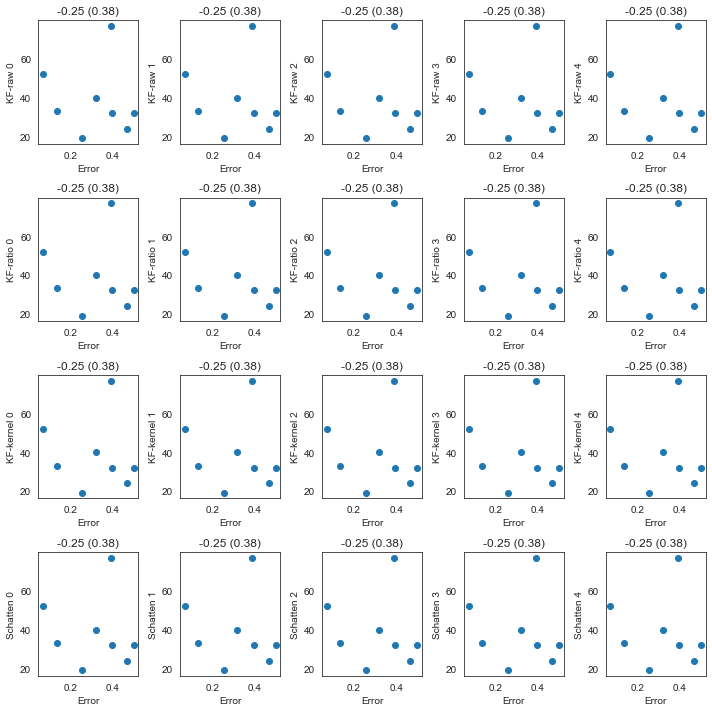

In [11]:
sns.set_style('white')
fig, axes = plt.subplots(4, 5, figsize=(10, 10))

for row, (key, val) in enumerate(mat_norm_dict.items()):
    for col in range(5):
        ax = axes[row, col]
        complexity = np.asarray(val)[:, col]
        complexity = [np.sum(Z, axis=0).max() for Z in Zs]
        ax.scatter(errors, complexity)
        corr, pval = kendalltau(errors, complexity)
        ax.set_xlabel('Error')
        ax.set_ylabel(key + f' {col}')
        ax.set_title(f'{corr:.2f} ({pval:.2f})')

plt.tight_layout()
plt.show()

In [8]:
raw_dir = Path('../data/raw/omr')

In [19]:
fish_ids = list(range(10, 16)) + [17]
stimuli = 'omr_looming'

Zs = []
complexities = []
errors = []
for fish_id in fish_ids:
    Z = np.genfromtxt(raw_dir / f'{stimuli}_fish{fish_id}_kmeans_clust.csv', delimiter=',')
    error = np.genfromtxt(raw_dir / f'{stimuli}_fish{fish_id}_raw_performanceTimes.csv', delimiter=',')
    Zs.append(Z)
    complexities.append(rstar_bound(Z))
    errors.append(np.mean(error))

mat_norm_dict = compute_matrixnorm(Zs)

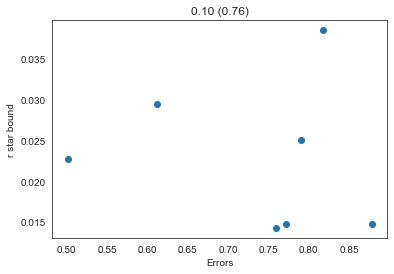

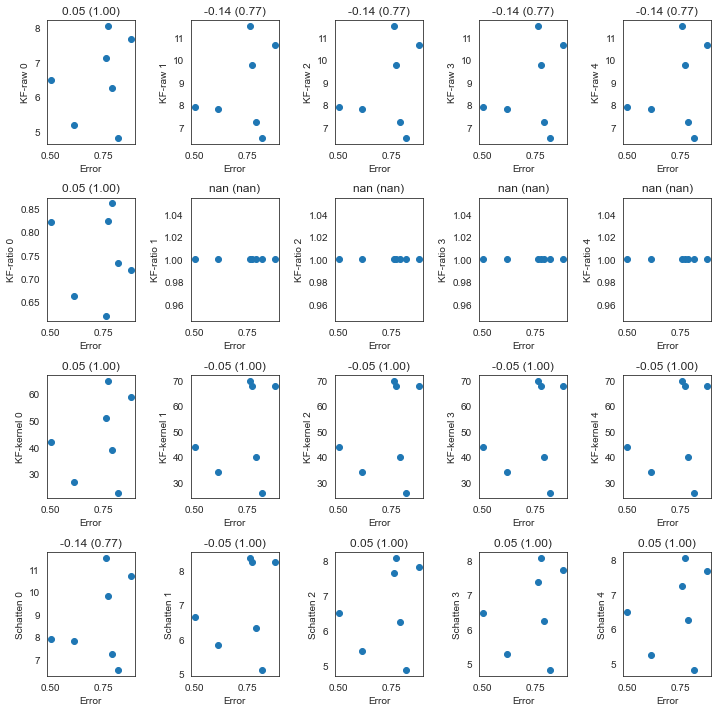

In [20]:
sns.set_style('white')

plt.scatter(errors, complexities)
plt.xlabel('Errors')
plt.ylabel('r star bound')
corr, pval = kendalltau(errors, complexities)
plt.title(f'{corr:.2f} ({pval:.2f})')
plt.show()

fig, axes = plt.subplots(4, 5, figsize=(10, 10))

for row, (key, val) in enumerate(mat_norm_dict.items()):
    for col in range(5):
        ax = axes[row, col]
        ax.scatter(errors, np.asarray(val)[:, col])
        corr, pval = kendalltau(errors, np.asarray(val)[:, col])
        ax.set_xlabel('Error')
        ax.set_ylabel(key + f' {col}')
        ax.set_title(f'{corr:.2f} ({pval:.2f})')

plt.tight_layout()
plt.show()

In [21]:
fish_ids = list(range(10, 16))
stimuli = 'omr_looming'

Zs = []
complexities = []
errors = []
for fish_id in fish_ids:
    Z = np.genfromtxt(raw_dir / f'{stimuli}_fish{fish_id}_kmeans_clust.csv', delimiter=',')
    error = np.genfromtxt(raw_dir / f'{stimuli}_fish{fish_id}_raw_performance.csv', delimiter=',')
    Zs.append(Z)
    complexities.append(rstar_bound(Z))
    errors.append(np.mean(error))

mat_norm_dict = compute_matrixnorm(Zs)

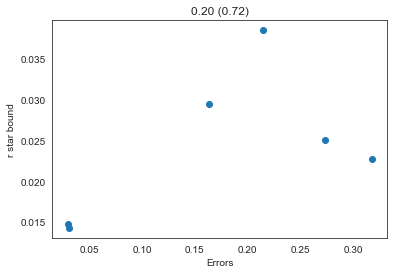

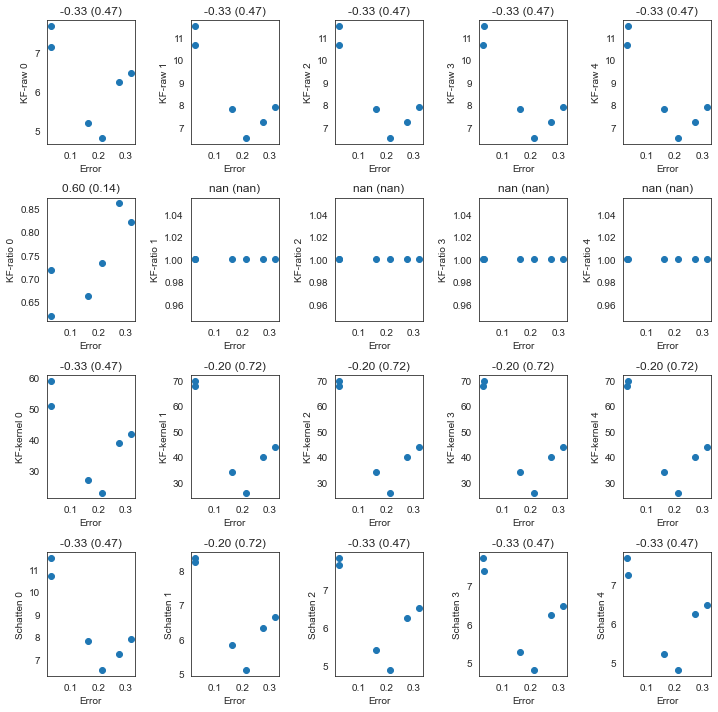

In [22]:
sns.set_style('white')

plt.scatter(errors, complexities)
plt.xlabel('Errors')
plt.ylabel('r star bound')
corr, pval = kendalltau(errors, complexities)
plt.title(f'{corr:.2f} ({pval:.2f})')
plt.show()

fig, axes = plt.subplots(4, 5, figsize=(10, 10))

for row, (key, val) in enumerate(mat_norm_dict.items()):
    for col in range(5):
        ax = axes[row, col]
        ax.scatter(errors, np.asarray(val)[:, col])
        corr, pval = kendalltau(errors, np.asarray(val)[:, col])
        ax.set_xlabel('Error')
        ax.set_ylabel(key + f' {col}')
        ax.set_title(f'{corr:.2f} ({pval:.2f})')

plt.tight_layout()
plt.show()

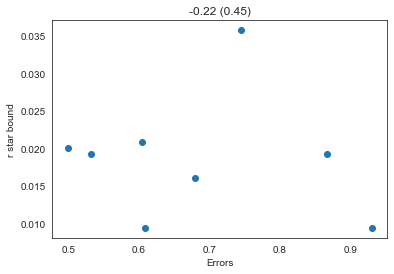

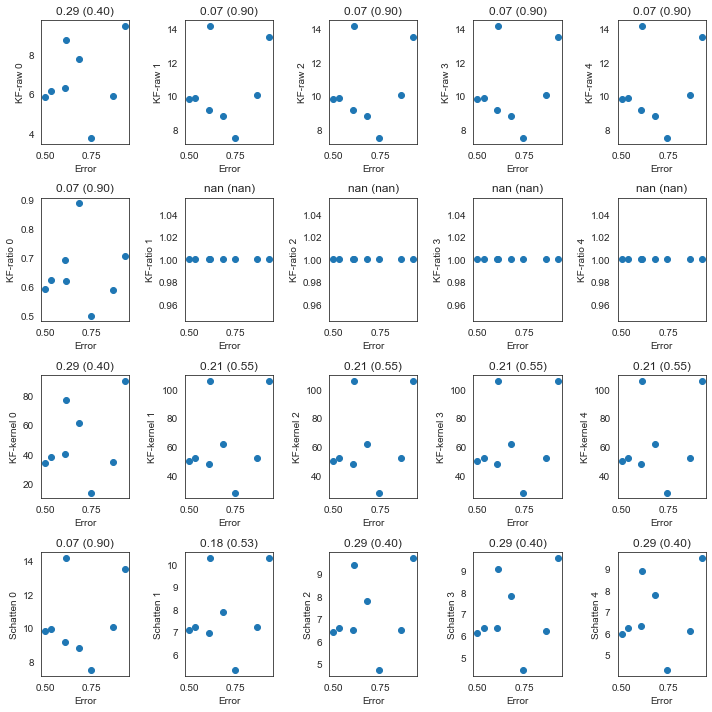

In [26]:
fish_ids = list(range(10, 18))
stimuli = 'pt_omr'

Zs = []
complexities = []
errors = []
for fish_id in fish_ids:
    Z = np.genfromtxt(raw_dir / f'{stimuli}_fish{fish_id}_kmeans_clust.csv', delimiter=',')
    error = np.genfromtxt(raw_dir / f'{stimuli}_fish{fish_id}_raw_performanceTimes.csv', delimiter=',')
    Zs.append(Z)
    complexities.append(rstar_bound(Z))
    errors.append(np.mean(error))

mat_norm_dict = compute_matrixnorm(Zs)

sns.set_style('white')

plt.scatter(errors, complexities)
plt.xlabel('Errors')
plt.ylabel('r star bound')
corr, pval = kendalltau(errors, complexities)
plt.title(f'{corr:.2f} ({pval:.2f})')
plt.show()

fig, axes = plt.subplots(4, 5, figsize=(10, 10))

for row, (key, val) in enumerate(mat_norm_dict.items()):
    for col in range(5):
        ax = axes[row, col]
        ax.scatter(errors, np.asarray(val)[:, col])
        corr, pval = kendalltau(errors, np.asarray(val)[:, col])
        ax.set_xlabel('Error')
        ax.set_ylabel(key + f' {col}')
        ax.set_title(f'{corr:.2f} ({pval:.2f})')

plt.tight_layout()
plt.show()

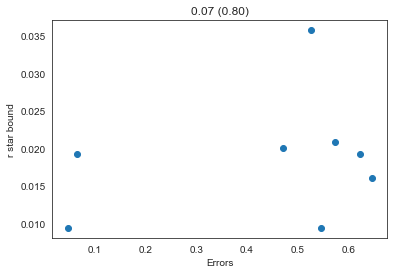

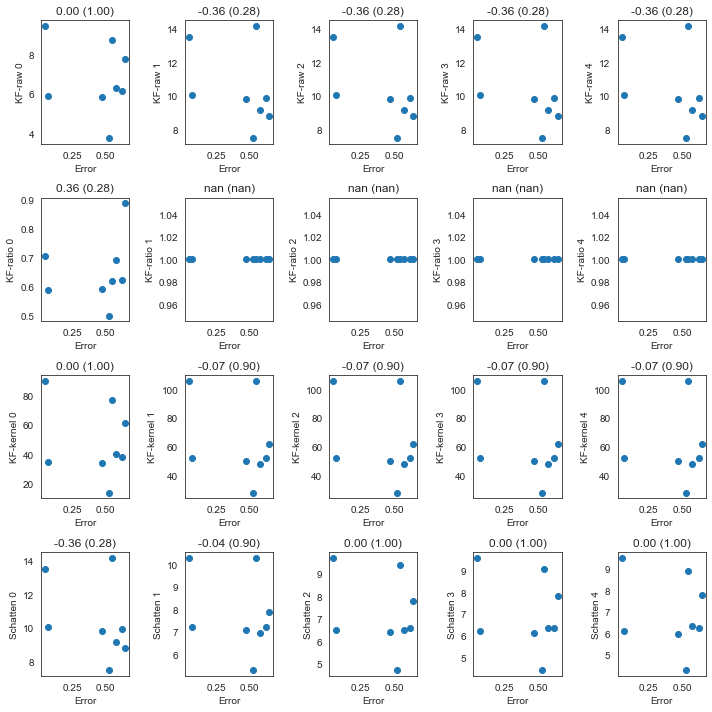

In [27]:
fish_ids = list(range(10, 18))
stimuli = 'pt_omr'

Zs = []
complexities = []
errors = []
for fish_id in fish_ids:
    Z = np.genfromtxt(raw_dir / f'{stimuli}_fish{fish_id}_kmeans_clust.csv', delimiter=',')
    error = np.genfromtxt(raw_dir / f'{stimuli}_fish{fish_id}_raw_performance.csv', delimiter=',')
    Zs.append(Z)
    complexities.append(rstar_bound(Z))
    errors.append(np.mean(error))

mat_norm_dict = compute_matrixnorm(Zs)

sns.set_style('white')

plt.scatter(errors, complexities)
plt.xlabel('Errors')
plt.ylabel('r star bound')
corr, pval = kendalltau(errors, complexities)
plt.title(f'{corr:.2f} ({pval:.2f})')
plt.show()

fig, axes = plt.subplots(4, 5, figsize=(10, 10))

for row, (key, val) in enumerate(mat_norm_dict.items()):
    for col in range(5):
        ax = axes[row, col]
        ax.scatter(errors, np.asarray(val)[:, col])
        corr, pval = kendalltau(errors, np.asarray(val)[:, col])
        ax.set_xlabel('Error')
        ax.set_ylabel(key + f' {col}')
        ax.set_title(f'{corr:.2f} ({pval:.2f})')

plt.tight_layout()
plt.show()